### Problem Statement:
Financial threats are displaying a trend about the credit risk of commercial banks as the
incredible improvement in the financial industry has arisen. In this way, one of the
biggest threats faces by commercial banks is the risk prediction of credit clients. The
**goal is to predict the probability of credit default** based on credit card owner's
characteristics and payment history.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

In [3]:
# loading data
df_raw = pd.read_csv('UCI_Credit_Card.csv (1)/UCI_Credit_Card.csv')

In [4]:
# reading 1st 5 columns
df_raw.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

### Data Description
We have records of 30000 customers credit card transaction for past 6 months.\
**Features:**

1.	LIMIT_BAL: continuous.Credit Limit of the person.
2.	SEX: Categorical: 1 = male; 2 = female
3.	EDUCATION: Categorical: 1 = graduate school; 2 = university; 3 = high school; 4 = others
4.	MARRIAGE: 1 = married; 2 = single; 3 = others
5.	AGE-num: continuous. 
6.	PAY_0 to PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005)
7.	BILL_AMT1 to BILL_AMT6: Amount of bill statements.
8.	PAY_AMT1 to PAY_AMT6: Amount of previous payments. 


**Target Label:**
Whether a person shall default in the credit card payment or not.\
9.	default payment next month:  Yes = 1, No = 0.

Scale for PAY_0 to PAY_6 : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)




In [6]:
# making copy of  original dataset
df= df_raw.copy()

In [7]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [8]:
# checking for null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [9]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
df['Defaulter'] =df ['default.payment.next.month']
# changing column name

In [11]:
df.drop('default.payment.next.month',axis = 1,inplace=True ,)

In [12]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<AxesSubplot:xlabel='Defaulter', ylabel='count'>

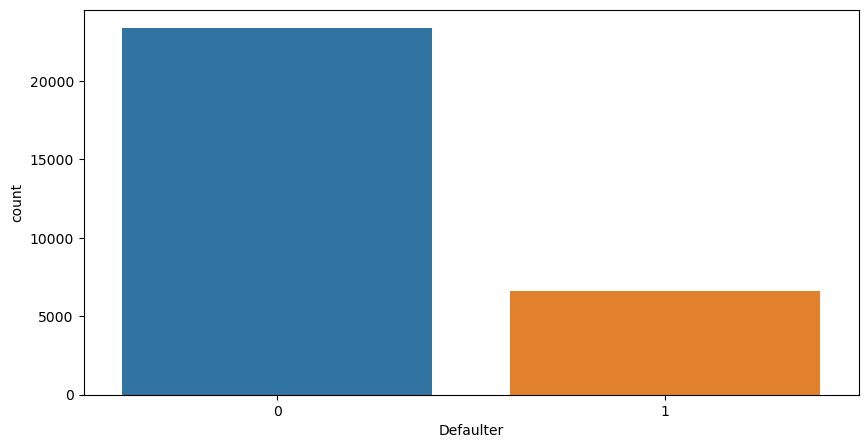

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Defaulter', data = df)

In [14]:
df['Defaulter'].value_counts()

0    23364
1     6636
Name: Defaulter, dtype: int64

### we can see that we have imbalance dataset ie both classes are not in proportion

### SMOTE( sythetic minority oversampling technique)

* SMOTES simply add duplicate new records of minority sample & donot add any new information to the model\
* SMOTE looks into the minority class instances and use k-nearest neighbour to select the random nearest neighbour and a synthetic instance is created randomly in feature space

In [15]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE()
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df.iloc[:,0:-1],df['Defaulter'])

In [16]:
print('Original dataset shape', len(df))
print('Resampled dataset shape', len(oversampled_Y))

Original dataset shape 30000
Resampled dataset shape 46728


In [17]:
oversampled_X

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.000000,2,2,1,24,2,2,-1,-1,...,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000
1,2,120000.000000,2,2,2,26,-1,2,0,0,...,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000
2,3,90000.000000,2,2,2,34,0,0,0,0,...,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000
3,4,50000.000000,2,2,1,37,0,0,0,0,...,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000
4,5,50000.000000,1,2,1,57,-1,0,-1,0,...,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,20050,87150.102934,1,2,1,38,0,0,0,0,...,60878.360668,59097.581436,19181.227795,4123.551646,2876.438106,3002.502536,4034.736104,6496.449562,1452.273190,17875.257335
46724,22130,190747.043547,1,1,1,26,0,0,0,0,...,183744.761167,157228.254088,91342.175361,92780.940866,9522.930483,7755.828099,9939.364583,9925.295645,2775.886936,10005.168738
46725,22329,130000.000000,1,2,2,33,0,0,0,0,...,106729.234890,94580.516284,88285.898783,89386.267768,5982.652733,4823.283928,3907.144384,3217.441088,3479.375193,4553.201784
46726,27273,50000.000000,2,2,1,47,0,0,0,0,...,17741.916658,16980.516467,15088.199725,13564.329317,2000.000000,1683.161152,1192.122247,3869.375085,1000.000000,596.061124


In [18]:
oversampled_Y

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: Defaulter, Length: 46728, dtype: int64

In [19]:
#oversampled_df= pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [20]:
columns=list(df.columns)

In [21]:
columns.pop()

'Defaulter'

In [22]:
balance_df = pd.DataFrame(oversampled_X , columns=columns)

In [23]:
balance_df['Defaulter']=oversampled_Y

In [24]:
balance_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
0,1,20000.000000,2,2,1,24,2,2,-1,-1,...,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,2,120000.000000,2,2,2,26,-1,2,0,0,...,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,3,90000.000000,2,2,2,34,0,0,0,0,...,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
3,4,50000.000000,2,2,1,37,0,0,0,0,...,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
4,5,50000.000000,1,2,1,57,-1,0,-1,0,...,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,20050,87150.102934,1,2,1,38,0,0,0,0,...,59097.581436,19181.227795,4123.551646,2876.438106,3002.502536,4034.736104,6496.449562,1452.273190,17875.257335,1
46724,22130,190747.043547,1,1,1,26,0,0,0,0,...,157228.254088,91342.175361,92780.940866,9522.930483,7755.828099,9939.364583,9925.295645,2775.886936,10005.168738,1
46725,22329,130000.000000,1,2,2,33,0,0,0,0,...,94580.516284,88285.898783,89386.267768,5982.652733,4823.283928,3907.144384,3217.441088,3479.375193,4553.201784,1
46726,27273,50000.000000,2,2,1,47,0,0,0,0,...,16980.516467,15088.199725,13564.329317,2000.000000,1683.161152,1192.122247,3869.375085,1000.000000,596.061124,1


<AxesSubplot:xlabel='Defaulter', ylabel='count'>

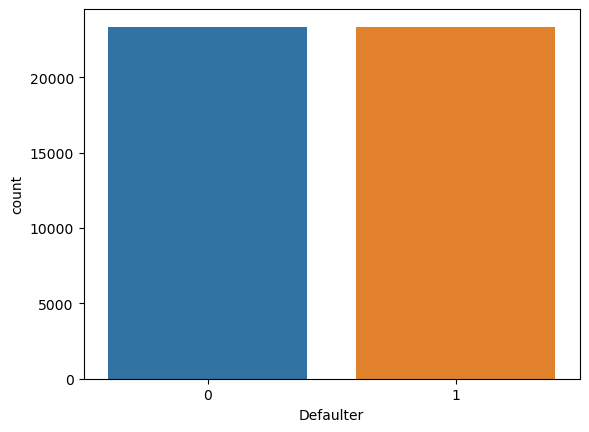

In [25]:
sns.countplot(data=balance_df , x='Defaulter')

In [26]:
datafr = balance_df.copy()

### categorical features

In [27]:
datafr.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [28]:
df.columns.unique

<bound method Index.unique of Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Defaulter'],
      dtype='object')>

2    23662
1    23066
Name: SEX, dtype: int64

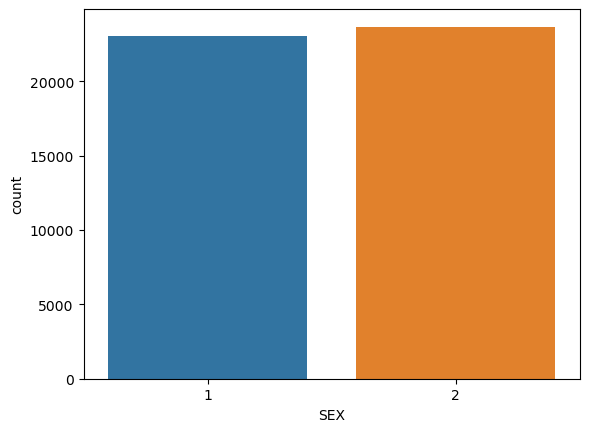

In [29]:
# comparison of balanced and imbalanced datasets
sns.countplot(x='SEX',data=datafr )
datafr['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

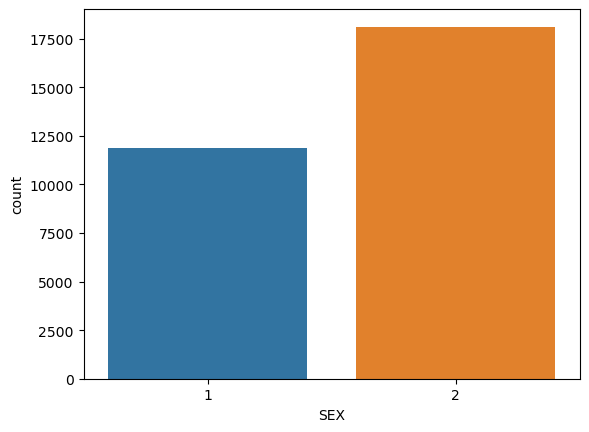

In [30]:
sns.countplot(x='SEX',data=df )
df['SEX'].value_counts()

 1= male , 2=female
 

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

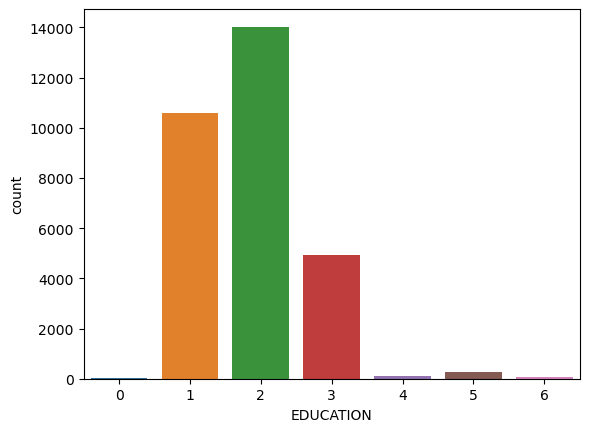

In [31]:
sns.countplot(x='EDUCATION',data=df)
df['EDUCATION'].value_counts()

1 = graduate school; 2 = university; 3 = high school 4= others \
education column has values like 5,6,0 as well for which we have no description so we add them in 4(others)

In [32]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [33]:
df['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

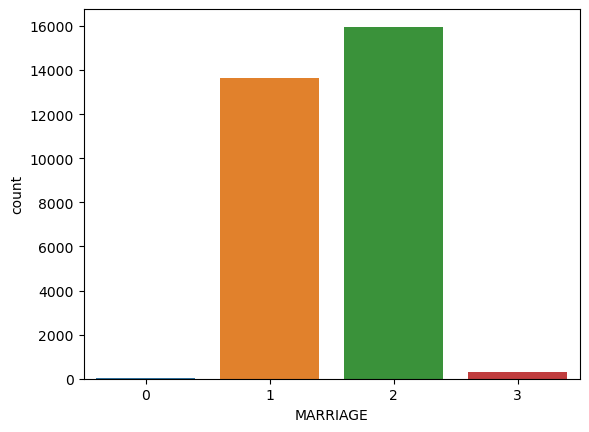

In [34]:
sns.countplot(x='MARRIAGE',data=df)
df['MARRIAGE'].value_counts()

In [35]:
# adding 0 to other categories
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

<AxesSubplot:xlabel='SEX', ylabel='Defaulter'>

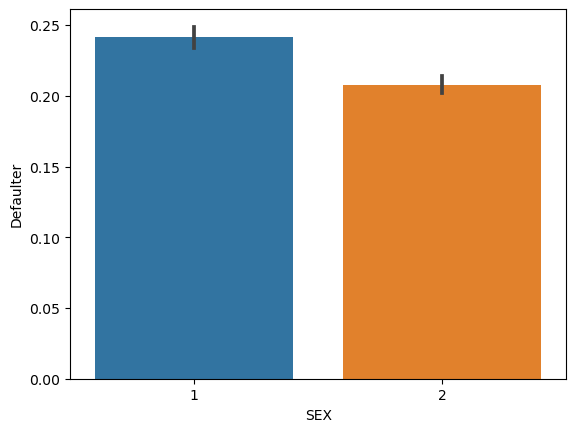

In [36]:
sns.barplot(data=df ,x= 'SEX', y='Defaulter')

In [37]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [38]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']


In [39]:
df_cat = df[categorical_features]
df_cat['Defaulter']=df['Defaulter']


In [40]:
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

<Figure size 1000x500 with 0 Axes>

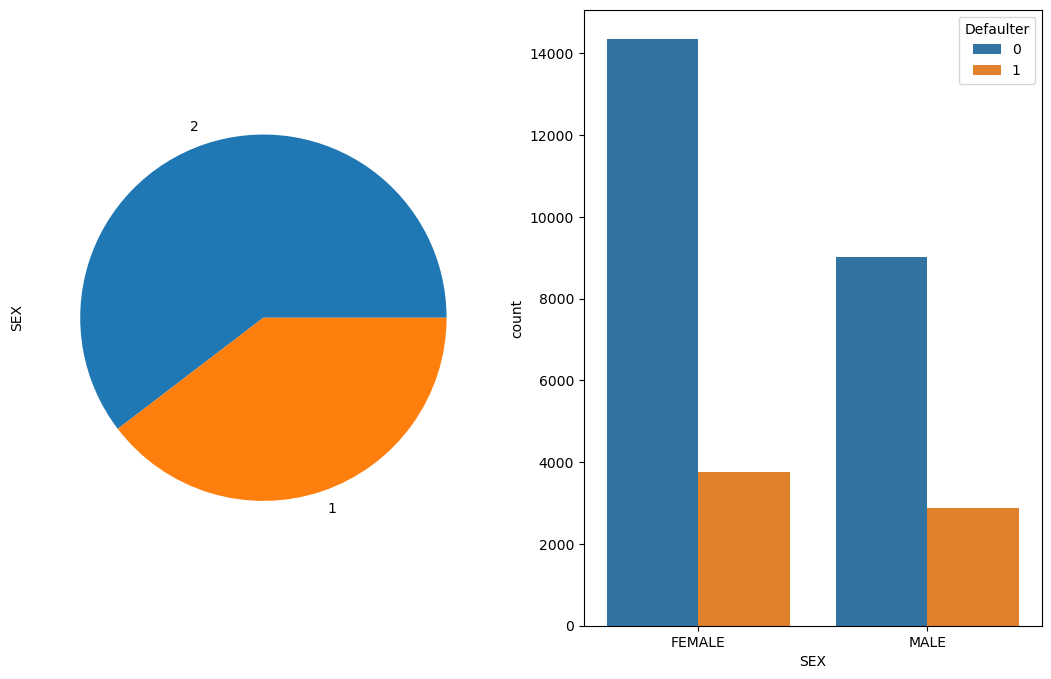

<Figure size 1000x500 with 0 Axes>

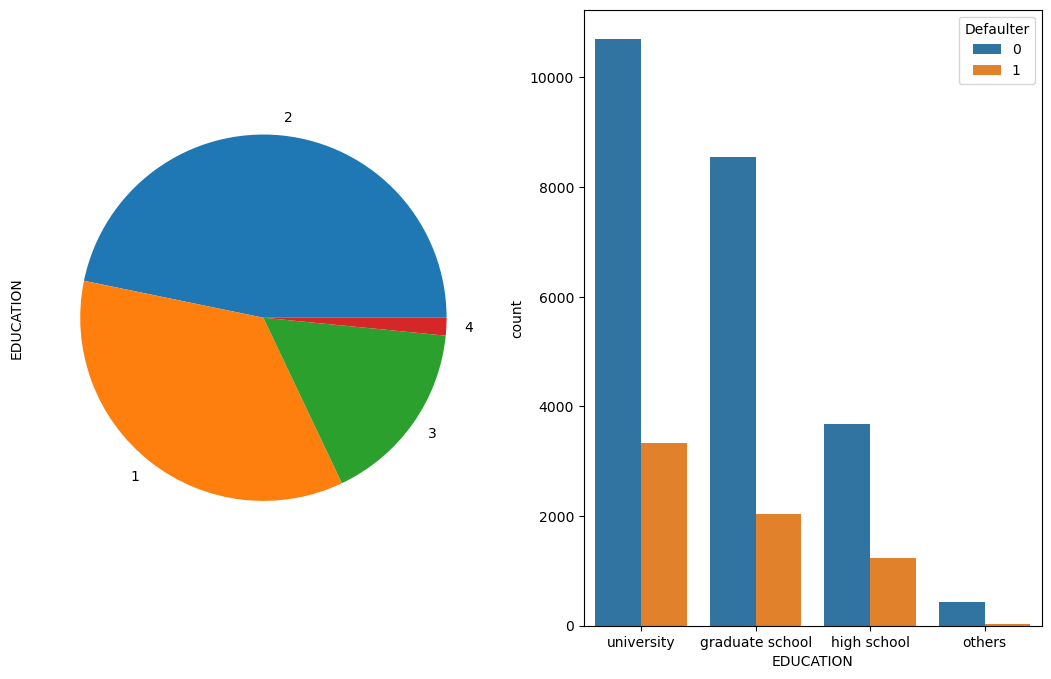

<Figure size 1000x500 with 0 Axes>

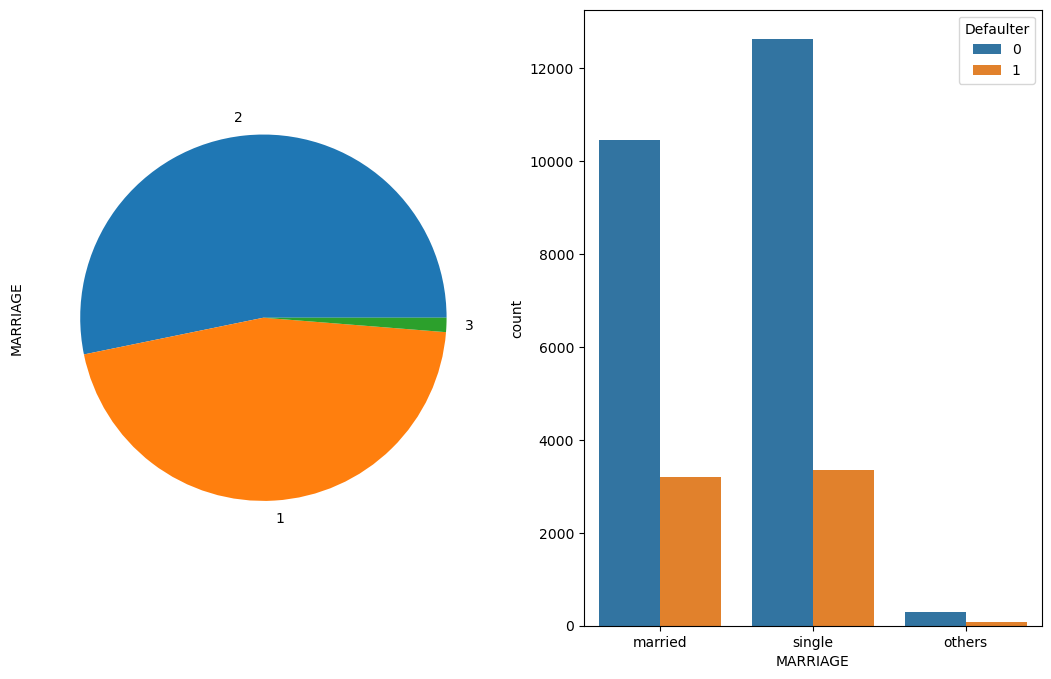

In [41]:
for col in categorical_features:
    plt.figure(figsize=(10,5))
    fig, axes = plt.subplots(ncols=2,figsize=(13,8))
    df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
    sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

Below are few observations for categorical features:

There are more females credit card holder,so no. of defaulter have high proportion of females.\
No. of defaulters have a higher proportion of educated people (graduate school and university)\
No. of defaulters have a higher proportion of Singles.\

In [42]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<AxesSubplot:xlabel='Defaulter', ylabel='LIMIT_BAL'>

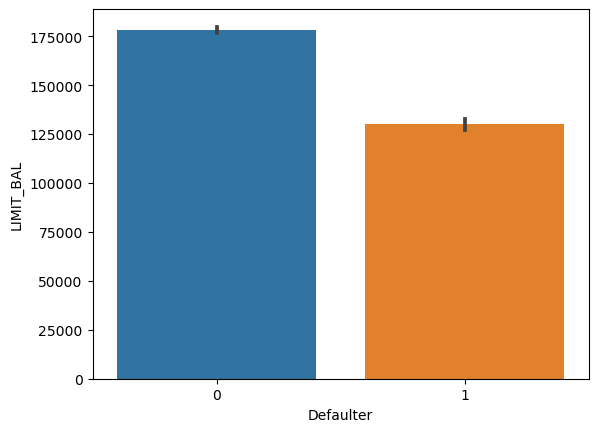

In [43]:
sns.barplot(x='Defaulter', y='LIMIT_BAL', data=df)

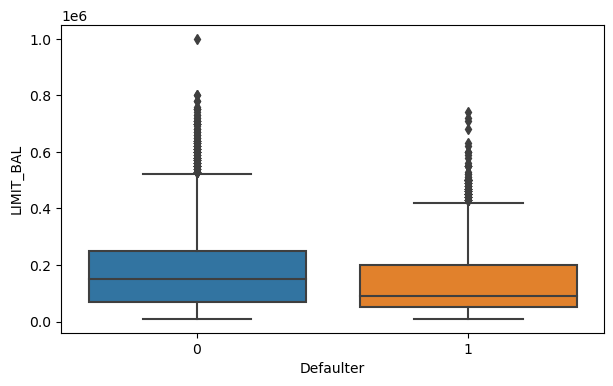

In [44]:
plt.figure(figsize=(7,4))
ax = sns.boxplot(x="Defaulter", y="LIMIT_BAL", data=df)

In [45]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [46]:
df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Defaulter'],
      dtype='object')

In [47]:

df['Defaulter'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: Defaulter, dtype: float64

* about 22% defaulted payements next month

# Data cleaning
check missing values\
column types\
column names\

In [38]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Defaulter    0
dtype: int64

In [39]:
df.rename(columns={'PAY_0':'PAY_1'},inplace = True)
df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Defaulter'],
      dtype='object')

In [40]:
# check duplicate records
condition = bool(df.duplicated(subset = 'ID').any())

if condition:
    print('There are duplicate IDs')
else:
    print('No duplicate IDs')

No duplicate IDs


<AxesSubplot:xlabel='LIMIT_BAL'>

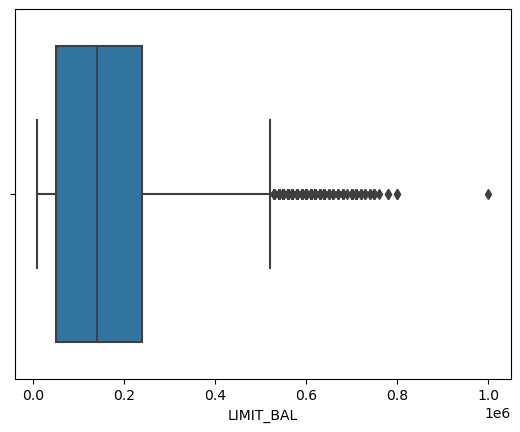

In [41]:
sns.boxplot(x='LIMIT_BAL',data=df)

In [42]:
outliers=df.loc[df['LIMIT_BAL']>700000]
outliers

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
2197,2198,1000000.0,2,1,1,47,0,0,0,-1,...,891586.0,927171.0,961664.0,50784.0,50723.0,896040.0,50000.0,50000.0,50256.0,0
3402,3403,710000.0,2,2,1,40,-2,-2,-2,-1,...,1004.0,854.0,8626.0,0.0,0.0,1004.0,0.0,8000.0,5000.0,1
3689,3690,710000.0,1,2,1,51,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3733,3734,750000.0,2,2,1,43,-1,-1,-1,-2,...,63749.0,85067.0,83208.0,99664.0,74640.0,63758.0,85072.0,83215.0,124063.0,0
4033,4034,710000.0,2,1,2,32,0,0,0,0,...,35774.0,35524.0,35047.0,3561.0,3696.0,1616.0,3024.0,5011.0,2011.0,0
4603,4604,750000.0,2,3,1,40,-2,-2,-1,-1,...,38488.0,9777.0,66692.0,15420.0,3691.0,38679.0,9825.0,67024.0,76641.0,0
5878,5879,710000.0,1,2,2,33,-1,-1,-1,-1,...,6299.0,4720.0,3738.0,17330.0,944.0,7586.0,4739.0,3754.0,25259.0,0
10089,10090,750000.0,2,1,1,41,0,0,0,0,...,75696.0,35485.0,4889.0,6817.0,2330.0,2705.0,50854.0,4913.0,550.0,0
10647,10648,720000.0,2,1,1,45,0,0,0,0,...,104501.0,83504.0,79411.0,8019.0,8043.0,10092.0,3020.0,2591.0,10081.0,0
13186,13187,750000.0,2,1,2,28,1,-1,-1,0,...,399493.0,400993.0,409483.0,250000.0,401003.0,7990.0,11000.0,417990.0,3080.0,0


outlier is just a credit user with excellent record of repayement.

In [43]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [44]:
df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

### 3. Findings and Hypothesis

In [45]:
# Set ID as dataframe index

df.set_index('ID', inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [46]:
df1 = df.copy()

In [47]:
df1["SEX"]=df1["SEX"].map({1:'M',2:'F'}).astype('category')

In [48]:
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,F,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,F,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,F,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,F,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,M,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [49]:
# Create a new column "HAS_DEF" to indicate customers who have at least 1 deafult payment from PAY_1 to Pay_6
# 0 : no default ; 1: has default

def_condition = (df1.PAY_1 >1) | (df1.PAY_2 >1) | (df1.PAY_3 >1) | (df1.PAY_4 >1) | (df1.PAY_5 >1) | (df1.PAY_6 >1)
df1.loc[def_condition, "HAS_DEF"] = 1
df1.loc[df1.HAS_DEF.isna(), "HAS_DEF"] = 0

In [50]:
# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def create_stacked_bar(column_name):

    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df1['HAS_DEF'],columns = df1[column_name], normalize = 'columns')
    
    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))
    
    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()
    
    list1_name = "No default"
    list2_name = "Has default"
    title = f"Default by {column_name}"
    xlabel = column_name
    ylabel = "Default percentage"
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")
    
    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

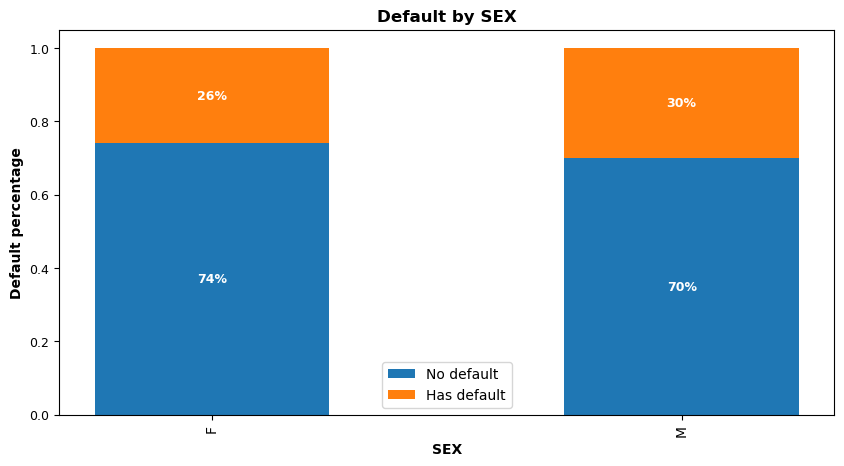

In [51]:
create_stacked_bar('SEX')

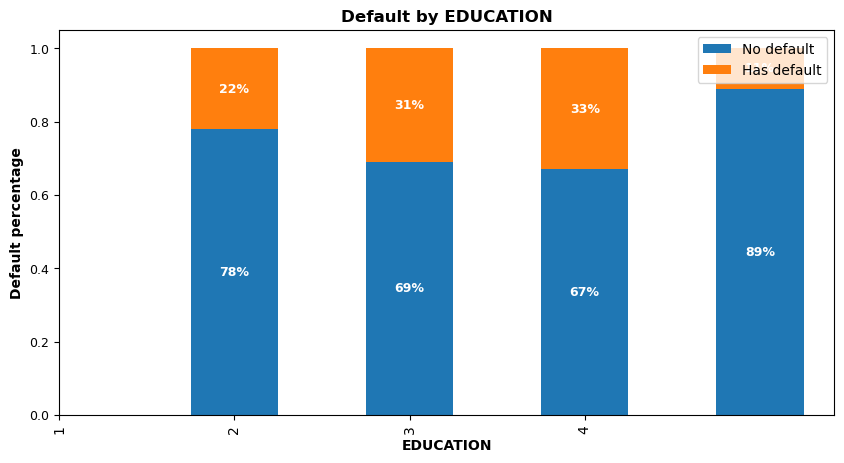

In [52]:
create_stacked_bar('EDUCATION')

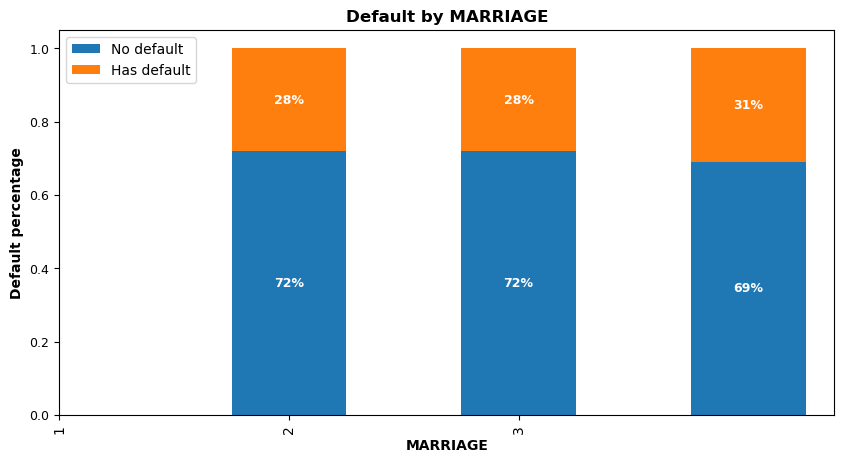

In [53]:
create_stacked_bar('MARRIAGE')

There is no difference of default risk in terms of marital status, although the 'other'marital status group had high default percentage.

In [56]:
# Segment the 'AGE' column to 6 groups

bins= [21,30,40,50,60,70,80]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80']
df1['AGE'] = pd.cut(df1['AGE'],bins=bins, labels=labels,right=False)

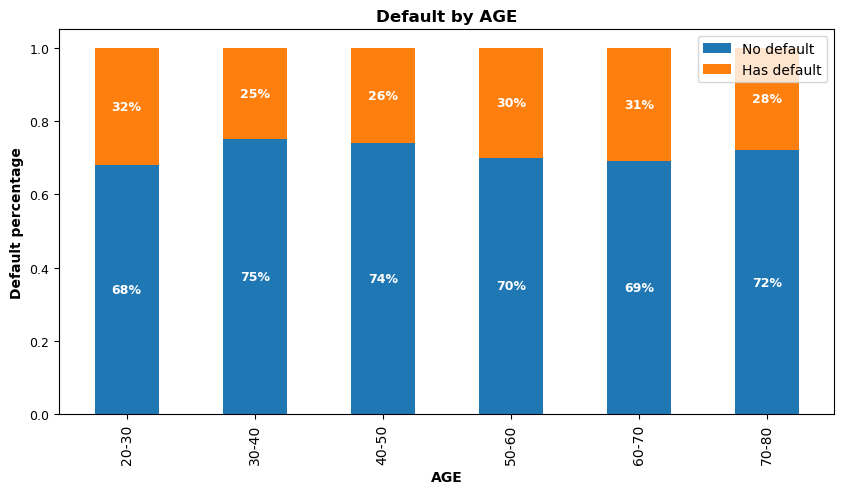

In [57]:

# Plot a stacked bar chart to visualize default and non-default by age

create_stacked_bar('AGE')

Customers aged between 30-50 had the lowest delayed payment rate, while younger groups (20-30) and older groups (50-70) all had higher delayed payment rates. However, the delayed rate dropped slightly again in customers older than 70 years.m

In [48]:
datafr.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [49]:
## preparation for model buliding

In [50]:
# Replace values in SEX, EDUCATION  and MARRIAGE variables
datafr['SEX'] = datafr['SEX'].replace({1:'Male', 2:'Female'})
datafr['EDUCATION'] = datafr['EDUCATION'].replace({1:'Graduation', 2:'University', 3:'High_School', 0:'Others', 4:'Others', 5:'Others', 6:'Others'})
datafr['MARRIAGE'] = datafr['MARRIAGE'].replace({1:'Married', 2:'Single', 0:'Others', 3:'Others'})
datafr.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [51]:
# Change column names PAY_1 to PAY_6
datafr.rename(columns={'PAY_0':'PAY_SEPT', 'PAY_2':'PAY_AUG', 'PAY_3':'PAY_JULY', 
                   'PAY_4':'PAY_JUNE', 'PAY_5':'PAY_MAY', 'PAY_6':'PAY_APRIL'}, inplace=True)

# Change column names PAY_AMT_1 to PAY_AMT_6
datafr.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT', 'PAY_AMT2':'PAY_AMT_AUG', 'PAY_AMT3':'PAY_AMT_JULY', 
                   'PAY_AMT4':'PAY_AMT_JUNE', 'PAY_AMT5':'PAY_AMT_MAY', 'PAY_AMT6':'PAY_AMT_APRIL'}, inplace=True)

# Change column names BILL_AMT_1 to BILL_AMT_6
datafr.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT', 'BILL_AMT2':'BILL_AMT_AUG', 'BILL_AMT3':'BILL_AMT_JULY', 
                   'BILL_AMT4':'BILL_AMT_JUNE', 'BILL_AMT5':'BILL_AMT_MAY', 'BILL_AMT6':'BILL_AMT_APRIL'}, inplace=True)


In [52]:
datafr.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,...,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,Defaulter
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [53]:
# Encoding categorical variables
datafr = pd.get_dummies(datafr,columns=['SEX', 'EDUCATION','MARRIAGE'])

datafr.head()

,ID,LIMIT_BAL,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,PAY_MAY,PAY_APRIL,BILL_AMT_SEPT,...,Defaulter,SEX_Female,SEX_Male,EDUCATION_Graduation,EDUCATION_High_School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,...,1,1,0,0,0,0,1,1,0,0
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,1,1,0,0,0,0,1,0,0,1
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,0,1,0,0,0,0,1,0,0,1
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,0,1,0,0,0,0,1,1,0,0
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,...,0,0,1,0,0,0,1,1,0,0


In [54]:
datafr.drop('ID' , axis=1 , inplace=True)

In [55]:
datafr.head(2)

,LIMIT_BAL,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,PAY_MAY,PAY_APRIL,BILL_AMT_SEPT,BILL_AMT_AUG,...,Defaulter,SEX_Female,SEX_Male,EDUCATION_Graduation,EDUCATION_High_School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,1,1,0,0,0,0,1,1,0,0
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,1,1,0,0,0,0,1,0,0,1


In [56]:
datafr.shape

(46728, 30)

In [57]:
datafr.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JULY', 'PAY_JUNE',
       'PAY_MAY', 'PAY_APRIL', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JULY', 'BILL_AMT_JUNE', 'BILL_AMT_MAY', 'BILL_AMT_APRIL',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JULY', 'PAY_AMT_JUNE',
       'PAY_AMT_MAY', 'PAY_AMT_APRIL', 'Defaulter', 'SEX_Female', 'SEX_Male',
       'EDUCATION_Graduation', 'EDUCATION_High_School', 'EDUCATION_Others',
       'EDUCATION_University', 'MARRIAGE_Married', 'MARRIAGE_Others',
       'MARRIAGE_Single'],
      dtype='object')

In [58]:
# Rearrange columns in dataframe before submitting for modeling
final_df = datafr[['SEX_Male', 'SEX_Female', 
                     'EDUCATION_High_School', 'EDUCATION_Graduation', 'EDUCATION_University', 'EDUCATION_Others',
                     'MARRIAGE_Single', 'MARRIAGE_Married', 'MARRIAGE_Others',
                     'AGE', 'LIMIT_BAL', 
                     'PAY_APRIL',
                     'PAY_MAY',
                     'PAY_JUNE',
                     'PAY_JULY',
                     'PAY_AUG',
                     'PAY_SEPT',
                     'BILL_AMT_APRIL', 'BILL_AMT_MAY', 'BILL_AMT_JUNE', 'BILL_AMT_JULY', 'BILL_AMT_AUG', 'BILL_AMT_SEPT',
                     'PAY_AMT_APRIL', 'PAY_AMT_MAY', 'PAY_AMT_JUNE', 'PAY_AMT_JULY', 'PAY_AMT_AUG', 'PAY_AMT_SEPT', 
                     'Defaulter']]


In [59]:
model_df = final_df.copy()

In [78]:
model_df.head()

,SEX_Male,SEX_Female,EDUCATION_High_School,EDUCATION_Graduation,EDUCATION_University,EDUCATION_Others,MARRIAGE_Single,MARRIAGE_Married,MARRIAGE_Others,AGE,...,BILL_AMT_JULY,BILL_AMT_AUG,BILL_AMT_SEPT,PAY_AMT_APRIL,PAY_AMT_MAY,PAY_AMT_JUNE,PAY_AMT_JULY,PAY_AMT_AUG,PAY_AMT_SEPT,Defaulter
0,0,1,0,0,1,0,0,1,0,24,...,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,1
1,0,1,0,0,1,0,1,0,0,26,...,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,1
2,0,1,0,0,1,0,1,0,0,34,...,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0
3,0,1,0,0,1,0,0,1,0,37,...,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,0
4,1,0,0,0,1,0,0,1,0,57,...,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,0


In [79]:
# Train Test split
X = model_df.drop(columns=['Defaulter'], axis=1)
y = model_df['Defaulter']

In [80]:
# independent variables
X

,SEX_Male,SEX_Female,EDUCATION_High_School,EDUCATION_Graduation,EDUCATION_University,EDUCATION_Others,MARRIAGE_Single,MARRIAGE_Married,MARRIAGE_Others,AGE,...,BILL_AMT_JUNE,BILL_AMT_JULY,BILL_AMT_AUG,BILL_AMT_SEPT,PAY_AMT_APRIL,PAY_AMT_MAY,PAY_AMT_JUNE,PAY_AMT_JULY,PAY_AMT_AUG,PAY_AMT_SEPT
0,0,1,0,0,1,0,0,1,0,24,...,0.000000,689.000000,3102.000000,3913.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000
1,0,1,0,0,1,0,1,0,0,26,...,3272.000000,2682.000000,1725.000000,2682.000000,2000.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000
2,0,1,0,0,1,0,1,0,0,34,...,14331.000000,13559.000000,14027.000000,29239.000000,5000.000000,1000.000000,1000.000000,1000.000000,1500.000000,1518.000000
3,0,1,0,0,1,0,0,1,0,37,...,28314.000000,49291.000000,48233.000000,46990.000000,1000.000000,1069.000000,1100.000000,1200.000000,2019.000000,2000.000000
4,1,0,0,0,1,0,0,1,0,57,...,20940.000000,35835.000000,5670.000000,8617.000000,679.000000,689.000000,9000.000000,10000.000000,36681.000000,2000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,1,0,0,0,1,0,0,1,0,38,...,59097.581436,60878.360668,77045.384775,76507.999597,17875.257335,1452.273190,6496.449562,4034.736104,3002.502536,2876.438106
46724,1,0,0,1,0,0,0,1,0,26,...,157228.254088,183744.761167,180739.498688,175487.766072,10005.168738,2775.886936,9925.295645,9939.364583,7755.828099,9522.930483
46725,1,0,0,0,1,0,1,0,0,33,...,94580.516284,106729.234890,122822.813208,125475.413630,4553.201784,3479.375193,3217.441088,3907.144384,4823.283928,5982.652733
46726,0,1,0,0,1,0,0,1,0,47,...,16980.516467,17741.916658,22579.002040,29470.134564,596.061124,1000.000000,3869.375085,1192.122247,1683.161152,2000.000000


In [81]:
# dependent variable
y

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: Defaulter, Length: 46728, dtype: int64

In [82]:
#standardising data
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [83]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
     

## Model

### 1.Random forest classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV
from sklearn import metrics  


In [68]:
random_forest = RandomForestClassifier()

In [69]:
# fit training data
random_forest.fit(X_train ,y_train)

RandomForestClassifier()

In [70]:
# prediction
X_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

In [71]:
train_recall_score_rf = recall_score(X_train_pred,y_train)
test_recall_score_rf = recall_score(y_test_pred,y_test)

In [72]:
print("The recall on train data is ", train_recall_score_rf)
print("The recall on test data is ", test_recall_score_rf)

The recall on train data is  0.999205233233478
The recall on test data is  0.8378178592548787


In [129]:
F1_score=f1_score(y_test_pred , y_test)
F1_score

0.8226157642618668

In [130]:
accuracy=accuracy_score(y_test , y_test_pred)
accuracy

0.8256651686996219

In [73]:
random_forest.feature_importances_

array([0.01543845, 0.01876195, 0.01201426, 0.00917785, 0.00743858,
       0.00149346, 0.01644584, 0.01961349, 0.00089472, 0.0523866 ,
       0.05680842, 0.02015932, 0.02655846, 0.02597798, 0.03703149,
       0.05443946, 0.07630805, 0.04140712, 0.04244138, 0.0425221 ,
       0.04386195, 0.04783414, 0.05721048, 0.04382008, 0.04036596,
       0.04199228, 0.04318047, 0.04943312, 0.05498258])

In [ ]:
## Feature selection

<AxesSubplot:>

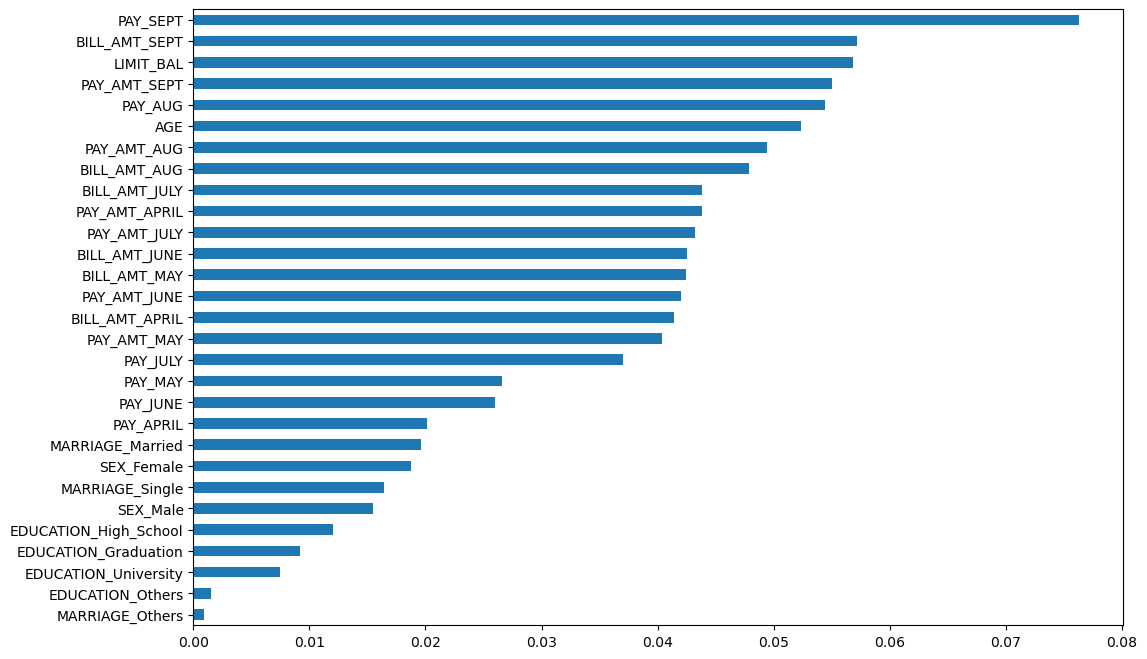

In [88]:
importances = pd.Series(random_forest.feature_importances_ , index=X.columns).sort_values(ascending=True)
importances.plot(kind = 'barh', figsize=(12,8))

In [136]:
## random forest model
pickle.dump(random_forest,open('random_forest_creditcard.pkl','wb'))

## 2 Random forest with hyper parameter tuning

In [94]:
param = {
    
    'n_estimators' :[5,10,50,100,120,150],
    'criterion': ['gini','entropy'],
    'max_depth': range(10),
    
    
}

In [97]:
grid_search_rf = GridSearchCV(param_grid=param , cv =8 , n_jobs=-1 , verbose = 1 , estimator = random_forest)

In [98]:
grid_search_rf.fit(X_train , y_train)

Fitting 8 folds for each of 120 candidates, totalling 960 fits


GridSearchCV(cv=8, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'n_estimators': [5, 10, 50, 100, 120, 150]},
             verbose=1)

In [99]:
grid_search_rf.best_params_

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 150}

In [100]:

rf_new = RandomForestClassifier(criterion='gini' , max_depth = 9 ,min_samples_leaf=1,n_estimators=150)

In [101]:
rf_new.fit(X_train , y_train)

RandomForestClassifier(max_depth=9, n_estimators=150)

In [102]:
X_train_preds = rf_new.predict(X_train)
y_test_preds = rf_new.predict(X_test)

In [103]:
train_recall_score_rf_new = recall_score(X_train_preds,y_train)
test_recall_score_rf_new = recall_score(y_test_preds,y_test)

In [104]:
print("The recall on train data is ", train_recall_score_rf_new)
print("The recall on test data is ", test_recall_score_rf_new)

The recall on train data is  0.8342017368069472
The recall on test data is  0.8031176929072487


## 3. XGBoost classifier

In [106]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

In [109]:
param_grid_xgboost = {

                "n_estimators": [50,100, 130],
                               "max_depth": range(3,7,11,),
    "random_state":[0,50,100]
    

            }

In [110]:
# Creating an object of the Grid Search class
grid_cv= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid_xgboost, verbose=2,cv=5,n_jobs=-1)

In [111]:
grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
             

In [112]:
grid_cv.best_params_

{'max_depth': 3, 'n_estimators': 130, 'random_state': 0}

In [113]:
grid_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=130,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [118]:
xgb_model = XGBClassifier(**grid_cv.best_params_)

In [119]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=130,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [120]:
X_train_predict = xgb_model.predict(X_train)
y_test_predict = xgb_model.predict(X_test)

In [121]:
train_recall_score_xgb = recall_score(X_train_predict,y_train)
test_recall_score_xgb = recall_score(y_test_predict,y_test)

In [122]:
print("The recall on train data is ", train_recall_score_xgb)
print("The recall on test data is ", test_recall_score_xgb)

The recall on train data is  0.8513425016371972
The recall on test data is  0.8261809200370485


In [124]:
score = accuracy_score(y_test, y_test_predict)
print('accuracy_score is',score)

accuracy_score is 0.8011270418717454


In [127]:
F1_score=f1_score(y_test, y_test_predict)
print('F1_score is : ', F1_score)

F1_score is :  0.7933590275718944


<AxesSubplot:>

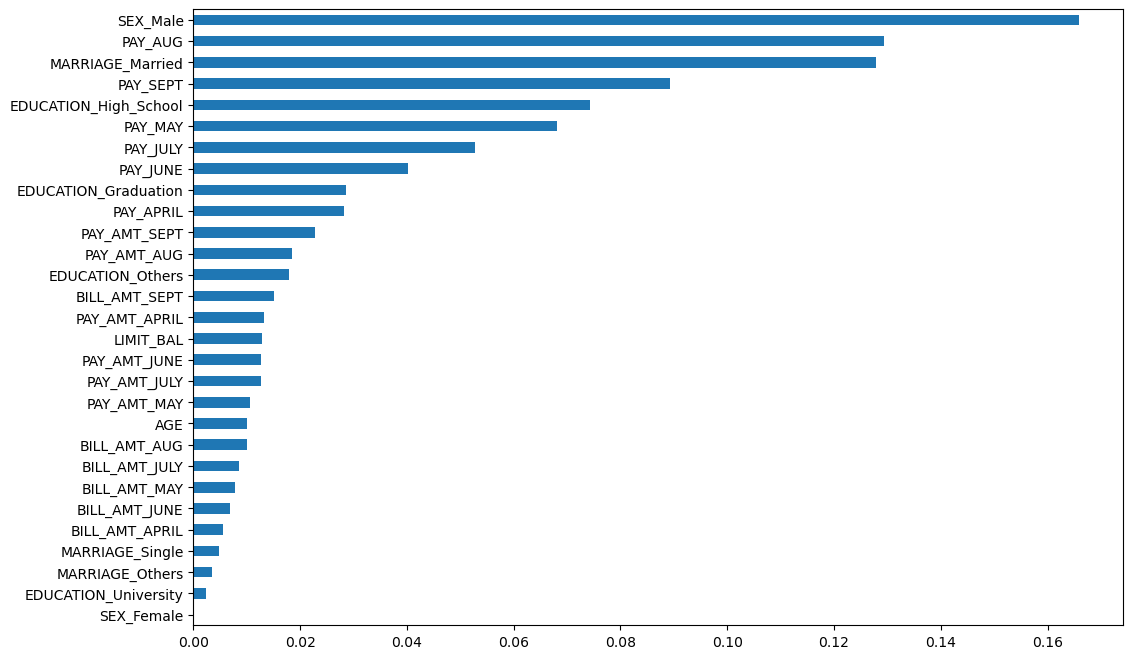

In [128]:
importances = pd.Series(xgb_model.feature_importances_ , index=X.columns).sort_values(ascending=True)
importances.plot(kind = 'barh', figsize=(12,8))

In [135]:
# creating pickle file for XGBoost
import pickle
pickle.dump(xgb_model , open('xgb_model_creditcard.pkl','wb'))

In [131]:
## randomforest turnout to give better results than other classifier


In [132]:
## feature engg for random forest

In [137]:
datafr['BILL_AMT_AVG'] = (datafr['BILL_AMT_APRIL'] + datafr['BILL_AMT_MAY'] + datafr['BILL_AMT_JUNE'] + datafr['BILL_AMT_JULY'] + datafr['BILL_AMT_AUG'] + datafr['BILL_AMT_SEPT'])/6


In [138]:
datafr.head()

,LIMIT_BAL,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,PAY_MAY,PAY_APRIL,BILL_AMT_SEPT,BILL_AMT_AUG,...,SEX_Female,SEX_Male,EDUCATION_Graduation,EDUCATION_High_School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single,BILL_AMT_AVG
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,1,0,0,0,0,1,1,0,0,1284.000000
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,1,0,0,0,0,1,0,0,1,2846.166667
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,1,0,0,0,0,1,0,0,1,16942.166667
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,1,0,0,0,0,1,1,0,0,38555.666667
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,0,1,0,0,0,1,1,0,0,18223.166667


In [139]:
feature_imp_df=model_df[importances.index[:15]]

In [142]:
feature_imp_df['Defaulter']=model_df['Defaulter']

In [144]:
feature_imp_df['BILL_AMT_AVG']=datafr['BILL_AMT_AVG']

In [169]:
feature_imp_df.head()

,SEX_Female,EDUCATION_University,MARRIAGE_Others,MARRIAGE_Single,BILL_AMT_APRIL,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_JULY,BILL_AMT_AUG,AGE,PAY_AMT_MAY,PAY_AMT_JULY,PAY_AMT_JUNE,LIMIT_BAL,PAY_AMT_APRIL,Defaulter,BILL_AMT_AVG
0,1,1,0,0,0.0,0.0,0.0,689.0,3102.0,24,0.0,0.0,0.0,20000.0,0.0,1,1284.000000
1,1,1,0,1,3261.0,3272.0,3455.0,2682.0,1725.0,26,0.0,1000.0,1000.0,120000.0,2000.0,1,2846.166667
2,1,1,0,1,15549.0,14331.0,14948.0,13559.0,14027.0,34,1000.0,1000.0,1000.0,90000.0,5000.0,0,16942.166667
3,1,1,0,0,29547.0,28314.0,28959.0,49291.0,48233.0,37,1069.0,1200.0,1100.0,50000.0,1000.0,0,38555.666667
4,0,1,0,0,19131.0,20940.0,19146.0,35835.0,5670.0,57,689.0,10000.0,9000.0,50000.0,679.0,0,18223.166667


In [170]:
feature_imp_df.columns

Index(['SEX_Female', 'EDUCATION_University', 'MARRIAGE_Others',
       'MARRIAGE_Single', 'BILL_AMT_APRIL', 'BILL_AMT_JUNE', 'BILL_AMT_MAY',
       'BILL_AMT_JULY', 'BILL_AMT_AUG', 'AGE', 'PAY_AMT_MAY', 'PAY_AMT_JULY',
       'PAY_AMT_JUNE', 'LIMIT_BAL', 'PAY_AMT_APRIL', 'Defaulter',
       'BILL_AMT_AVG'],
      dtype='object')

In [171]:
df_rearrange = feature_imp_df[['SEX_Female', 'EDUCATION_University', 'MARRIAGE_Others',
       'MARRIAGE_Single', 'BILL_AMT_APRIL', 'BILL_AMT_JUNE', 'BILL_AMT_MAY',
       'BILL_AMT_JULY', 'BILL_AMT_AUG', 'AGE', 'PAY_AMT_MAY', 'PAY_AMT_JULY',
       'PAY_AMT_JUNE', 'LIMIT_BAL', 'PAY_AMT_APRIL','BILL_AMT_AVG','Defaulter']]

In [173]:
feature_imp_df=df_rearrange.copy()

In [175]:
feature_imp_df.head()

,SEX_Female,EDUCATION_University,MARRIAGE_Others,MARRIAGE_Single,BILL_AMT_APRIL,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_JULY,BILL_AMT_AUG,AGE,PAY_AMT_MAY,PAY_AMT_JULY,PAY_AMT_JUNE,LIMIT_BAL,PAY_AMT_APRIL,BILL_AMT_AVG,Defaulter
0,1,1,0,0,0.0,0.0,0.0,689.0,3102.0,24,0.0,0.0,0.0,20000.0,0.0,1284.000000,1
1,1,1,0,1,3261.0,3272.0,3455.0,2682.0,1725.0,26,0.0,1000.0,1000.0,120000.0,2000.0,2846.166667,1
2,1,1,0,1,15549.0,14331.0,14948.0,13559.0,14027.0,34,1000.0,1000.0,1000.0,90000.0,5000.0,16942.166667,0
3,1,1,0,0,29547.0,28314.0,28959.0,49291.0,48233.0,37,1069.0,1200.0,1100.0,50000.0,1000.0,38555.666667,0
4,0,1,0,0,19131.0,20940.0,19146.0,35835.0,5670.0,57,689.0,10000.0,9000.0,50000.0,679.0,18223.166667,0


In [176]:
X = feature_imp_df.drop('Defaulter', axis=1)
y = feature_imp_df['Defaulter']

#standardising data
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [178]:
# random forest with feature importance
random_f = RandomForestClassifier()
random_f.fit(X_train,y_train)


RandomForestClassifier()

In [179]:
train_pred = random_f.predict(X_train)
test_pred = random_f.predict(X_test)

In [180]:
train_recall_score = recall_score(train_pred,y_train)
test_recall_score = recall_score(test_pred,y_test)


In [181]:
print("The recall score on train data is ", train_recall_score)
print("The recall score on test data is ", test_recall_score)

The recall score on train data is  0.9986623863028358
The recall score on test data is  0.8055734190782422


In [182]:
accuracy_score(y_test,test_pred)

0.8040873100791782

In [185]:
pickle.dump(random_f , open('randomforest_feat_eng_creditcard','wb'))

In [184]:
# for compressing model
import bz2file as bz2 

In [187]:
def compressed_pickle(title, data):
    with bz2.BZ2File(title + '.pbz2', 'w') as f:
        pickle.dump(data, f)

In [188]:
compressed_pickle('randomforest_feat_eng_creditcard', random_f)

In [189]:
## XGBoost with feature importance
xgb_feature= XGBClassifier()
xgb_feature.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [190]:
train_pred = xgb_feature.predict(X_train)
test_pred = xgb_feature.predict(X_test)

In [191]:
train_recall_scores = recall_score(train_pred,y_train)
test_recall_scores = recall_score(test_pred,y_test)

In [192]:
print("The recall score on train data is ", train_recall_scores)
print("The recall score on test data is ", test_recall_scores)

The recall score on train data is  0.8625013512052752
The recall score on test data is  0.7740957331600606


In [193]:
accuracy_score(y_test , test_pred)

0.7698480633426065

In [194]:
#xgb_model is tuned and we use feature important on this model
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=130,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [195]:
train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)

In [196]:
train_recall_scores = recall_score(train_pred,y_train)
test_recall_scores = recall_score(test_pred,y_test)

In [197]:
print("The recall score on train data is ", train_recall_scores)
print("The recall score on test data is ", test_recall_scores)

The recall score on train data is  0.7694762031374635
The recall score on test data is  0.7437260740110592


In [198]:
accuracy_score(y_test , test_pred)

0.7442756259362294

In [2]:
import pickle
model1= pickle.load(open('xgb_model_creditcard.pkl' , 'rb'))